In [5]:
%matplotlib inline

In [1]:
import matplotlib as mp
import matplotlib.pylab as plt
import numpy as np

import scipy as sp
import pandas as pd
from sklearn.decomposition import PCA


#libreria sismica
from seismic_source import SeismicEvent, Source

In [2]:
e = SeismicEvent.evento("../data-sets/2011_apr_10_07_52")

importado!


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [3]:
src = Source.Source(e)

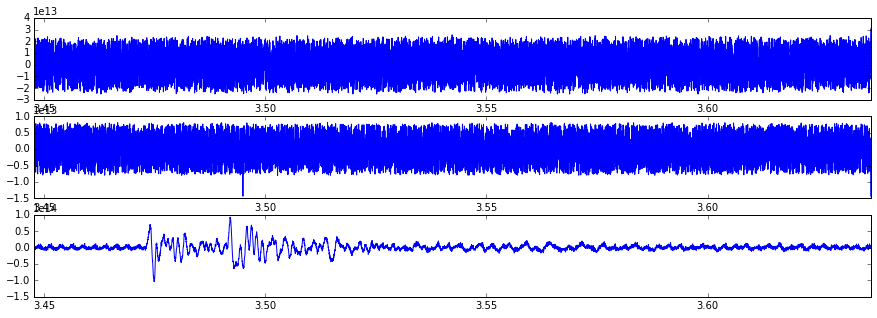

In [36]:
st /= st.sum()

pca = PCA()
pca.fit(st)
st = pd.DataFrame(pca.transform(st), index = gs.data.index.values)


st /= st.sum()

pca = PCA()
pca.fit(st)
st = pd.DataFrame(pca.transform(st), index = gs.data.index.values)
st /= st.sum()

pca = PCA()
pca.fit(st)
st = pd.DataFrame(pca.transform(st), index = gs.data.index.values)
st /= st.sum()

pca = PCA()
pca.fit(st)
st = pd.DataFrame(pca.transform(st), index = gs.data.index.values)
st /= st.sum()

pca = PCA()
pca.fit(st)
st = pd.DataFrame(pca.transform(st), index = gs.data.index.values)
st /= st.sum()


fig, axes = plt.subplots(nrows=3, ncols=1)

fig.set_figheight(5)
fig.set_figwidth(15)

st[0].plot(ax=axes[0])
st[1].plot(ax=axes[1])
st[2].plot(ax=axes[2])

La descomposición en componentes principales de un evento sísmico nos permite separar el impulso de la onda $S$ y la onda $P$ ya que estas son ortogolaes.

Buscamos aproximar la siguiente función que nos permite identificar el tiempo de llegada de la onda $P$ y $S$

importado!


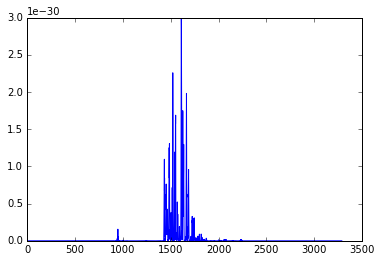

In [6]:
e = SeismicEvent.evento("../data-sets/2011_apr_10_07_52")
ss = e.seismograms[4]
u = np.array([ss.X_coord, ss.Y_coord, ss.Z_coord])

#analisis de componentes principales del sismo para encontrar los mejores candidatos para 
#la estimación del epicentro

pca = PCA()
pca.fit(ss.raw_data)
st = pd.DataFrame(pca.transform(ss.raw_data), index = ss.raw_data.index.values)


en = (st.prod(axis=1).diff()**2).fillna(0)
#plt.plot(ss.raw_data)
plt.plot(en.values)

In [7]:
#descomposicion ortgonal
covariance_matrix = cov(cumsum(ss.data[:, 2:5], axis=1), rowvar=0)
eig_val, eig_vec = eig(covariance_matrix)

# verificar que la matriz sea simetrica y que el cambio de base produzca
# covarianza cero entre las 3 se~nales retornar el cambio de dase
rot = dot(cumsum(ss.data[:, 2:5], axis=1), eig_vec)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(rot[:,0])
ax2.plot(rot[:,1])
ax3.plot(rot[:,2])

NameError: name 'cov' is not defined

importado!


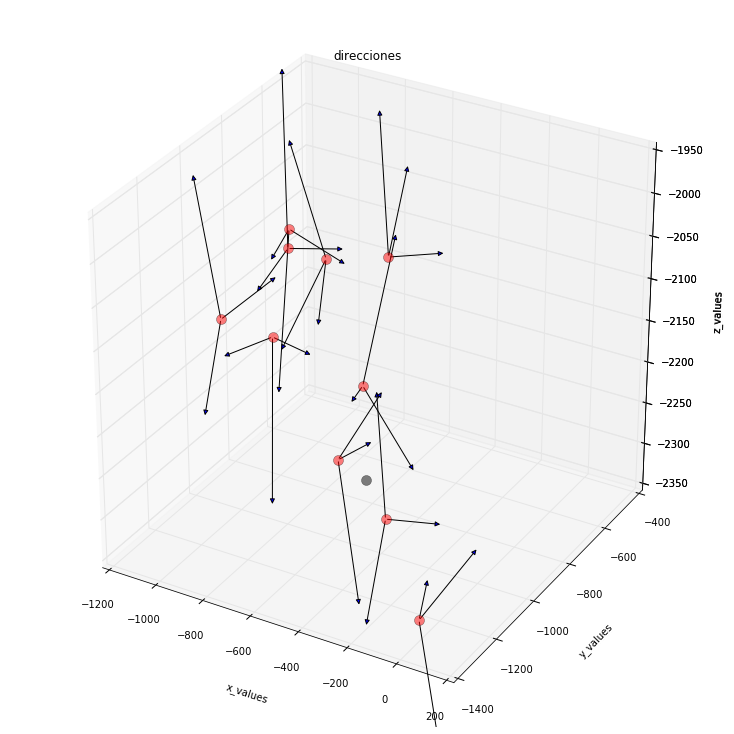

In [7]:
%matplotlib inline
from seismic_source import SeismicEvent

import numpy.linalg as ln

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, proj3d


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# Dibujar vectores
e = SeismicEvent.evento("./../data-sets/1998_aug_09_21_49_22.4n3")

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

#estimacion del epicentro
plt.plot([e.LocX], [e.LocY], [e.LocZ], 'o', markersize=10, color='black', alpha=0.5)

for i, ss in enumerate(e.seismograms):

    #descomposicion ortgonal de la señal
    covariance_matrix = ss.data.cov()
    eig_val, eig_vec = ln.eig(covariance_matrix)
 
    #graficar las direcciones
    plt.plot([ss.X_coord], [ss.Y_coord], [ss.Z_coord], 'o', markersize=10, color='red', alpha=0.5)
    n = 200
    for v in eig_vec:
    
        # graficamos los vectores propios cuyo largo son los valores propios
        a = Arrow3D([ss.X_coord, ss.X_coord + n*v[0]], 
                    [ss.Y_coord, ss.Y_coord + n*v[1]], 
                    [ss.Z_coord, ss.Z_coord + n*v[2]], mutation_scale=10, arrowstyle="-|>")
        ax.add_artist(a)        
    
    ax.set_xlabel('x_values')
    ax.set_ylabel('y_values')
    ax.set_zlabel('z_values')
    plt.draw()
    
plt.title('direcciones')

Estimación individual del epicentro
==
Podemos estimar individualmente el epicentro, buscando el punto que genera el mejor sismo para cada uno de los sismogramas (minimiza el error de estimación). Luego ver si este conjunto de epicentros se agrupan de alguna manera. Para ello necesitamos una condición inicial del epicentro sismico que podemos obtener por el análisis de componentes principales o buscando un decenso de gradiente para **loc_x** , **loc_y** y **loc_z**.

In [8]:
%%time
#libreria sismica
from seismic_source import SeismicEvent, Source
e = SeismicEvent.evento("./../data-sets/1998_aug_07_16_24_33.i6b")
estimation = Source.Source(e)
src, error, rot, vec, val = estimation.source(numpoints=50, L=0.5, por = 0.5)

importado!
CPU times: user 22 s, sys: 4.66 s, total: 26.7 s
Wall time: 27.9 s


In [11]:
from scipy.optimize import fmin
def error_function(x):
    src, error, rot, vec, val = estimation.source(numpoints=10, L=0.5, por = 0.1, LocR=x)
    return error
#Estimar el epicentro con un solo sismo
sol = fmin(error_function, x0 = [0,0,0])

Optimization terminated successfully.
         Current function value: 27.775499
         Iterations: 134
         Function evaluations: 260


In [15]:

import numpy as np

In [18]:
x0 = fmin(error_function, x0 = np.array([0,0,0]), maxiter = 20)

preprocesamiento de las condiciones iniciales
==
Mediante información adicional se desea encontrar la mejor condición inicial

In [19]:
#podemos encontrar una buena aproximación para la condición inicial

from seismic_source import SeismicEvent, Source
e = SeismicEvent.evento("./../data-sets/1998_aug_07_16_24_33.i6b")

importado!


In [37]:
seis = e.seismograms[1]

num = np.zeros((1,3))
den = np.zeros((1,3))
for seis in e.seismograms:
    
    for i in range(3):
        num[0,i] += (seis.data[i] + seis.x_coord).sum()*seis.x_coord
        den[0,i] += (seis.data[i] + seis.x_coord).sum()

r_est = num/den
print r_est, "->", [e.LocX, e.LocY, e.LocZ]
 


[[-888.8543301 -888.8543301 -888.8543301]] -> [-450.606171, -964.084045, -2191.692383]


In [35]:
num[0,i]

849624854.60787189

In [38]:
#la suma de las correlaciones deben ser cero